In [1]:
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
from astropy import units as u
from fitfile_parsing import *

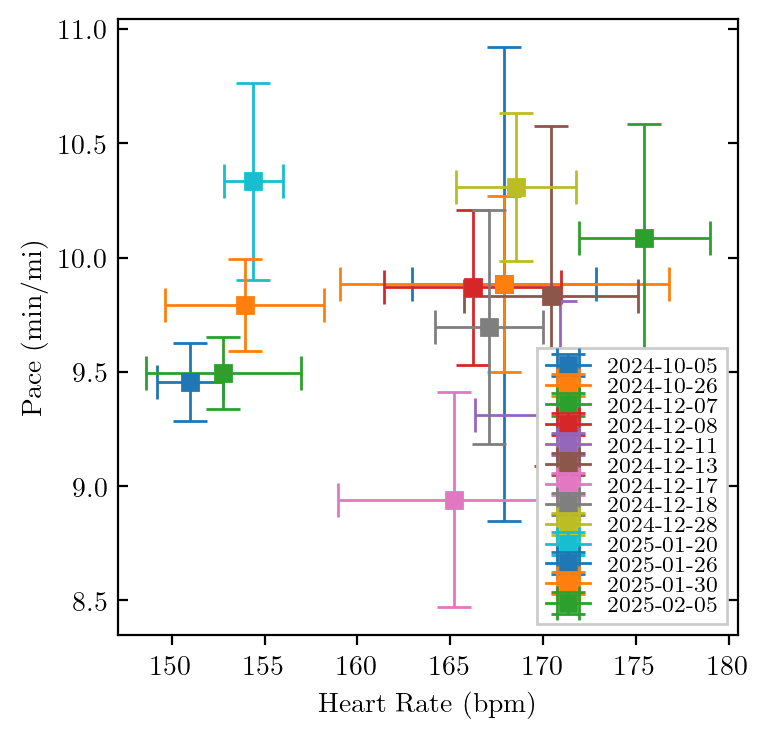

In [2]:
runs = glob("runs/*.fit")
num_runs = len(runs)

for i, f in enumerate(sorted(runs)):    
    values, units = fitfile_to_data(f,smoothing_seconds=60.,seconds_tocut=0)
    
    distances = values["distance"]
    heartrates = values["heart_rate"]
    timestamps = values["timestamp"]
    seconds_to_cut = 300
    if np.any(np.diff(distances) < 0): continue
    speed = np.gradient(smooth(distances,60.))[seconds_to_cut:]
#    print(np.diff(distances).min())
    if not len(speed): continue
#    speed = smooth(speed,120.)

    pace = 1 / (speed * u.m.to(u.imperial.mile) * 60)
    if np.any(speed==0):
        pace[speed==0] = np.inf

    sigma_pace = 0.5 * np.diff(np.percentile(pace,[16,84]))[0]
    if sigma_pace > 4:
        continue
    sigma_hr = 0.5 * np.diff(np.percentile(heartrates[seconds_to_cut:],[16,84]))[0]

    plt.errorbar(np.median(heartrates[seconds_to_cut:]),np.median(pace[seconds_to_cut:]),yerr=sigma_pace, xerr =sigma_hr,label=timestamps[-1].date(),lw=1,marker='s')
plt.ylabel("Pace (min/mi)")
plt.xlabel("Heart Rate (bpm)")
#plt.xlim(120,180)
plt.legend(labelspacing=0,frameon=True,fontsize=8)
plt.savefig("heartrate_vs_speed.pdf",bbox_inches='tight')

In [25]:
speed[:60]

array([0.077     , 0.12915   , 0.208235  , 0.2929115 , 0.40262035,
       0.45435832, 0.53242248, 0.73918024, 0.95476221, 1.11278599,
       1.28850739, 1.52265665, 1.76789099, 1.95160189, 2.0899417 ,
       2.19794753, 2.32615278, 2.4930375 , 2.62373375, 2.76636037,
       2.90822434, 2.9699019 , 3.04891171, 3.18702054, 3.25231849,
       3.25458664, 3.23612797, 3.19701518, 3.21131366, 3.21518229,
       3.15566406, 3.09559766, 3.09053789, 3.0819841 , 3.09028569,
       3.14425712, 3.15233141, 3.13859827, 3.13223844, 3.1175146 ,
       3.08426314, 3.06533682, 3.07030314, 3.08977283, 3.12529555,
       3.15726599, 3.15803939, 3.14323545, 3.15591191, 3.15582072,
       3.08623864, 2.99511478, 2.9201033 , 2.86109297, 2.82498367,
       2.79448531, 2.80003678, 2.8095331 , 2.79107979, 2.79547181])

In [2]:
from astropy import units as u; u.m.to(u.imperial.ft)

3.280839895013123